In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import Imputer,LabelEncoder
from scipy.stats import norm, skew
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_train = pd.read_csv('/Users/msingh/dataScience/kaggle/HousePricesPrediction/Data/train.csv')
df_test = pd.read_csv('/Users/msingh/dataScience/kaggle/HousePricesPrediction/Data/test.csv')

In [3]:
df_train.shape

(1460, 81)

In [4]:
df_test.shape

(1459, 80)

In [5]:
df = df_train.append(df_test, sort=False)

In [6]:
X = df_train.drop(['SalePrice'],axis=1)
y = df_train['SalePrice'].copy()

In [7]:
X_test = df_test.copy()

In [8]:
X_test.shape

(1459, 80)

In [9]:
X.shape

(1460, 80)

In [10]:
#We will use this later to save prediction for the respective id
df_output = pd.DataFrame({'Id':X_test.Id, 'SalePrice':''})

In [11]:
df = X.append(X_test, sort = False)

In [12]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [13]:
df.drop(['Id'],axis=1,inplace=True)

In [14]:
df.drop(['PoolQC','MiscFeature','Fence','Alley'], axis=1,inplace=True)

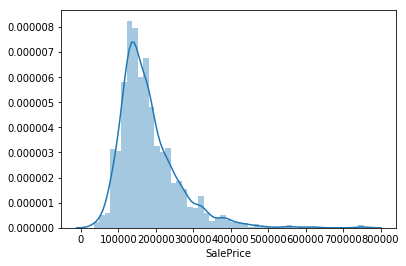

In [15]:
sns.distplot(y)

In [16]:
y=np.log1p(y)

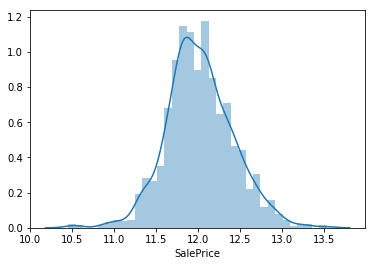

In [17]:
sns.distplot(y)

In [18]:
#Ignore the skewness of columns MSSubClass,OverallQual as it categorical in nature

In [19]:
df["MSSubClass"] = df["MSSubClass"].astype(object)
df["OverallQual"] = df["OverallQual"].astype(object)
df["OverallCond"] = df["OverallCond"].astype(object)

In [20]:
# Function to identify numeric features
def numeric_features(dataset):
    numeric_col = dataset.select_dtypes(include=['number']).columns
    return numeric_col

numeric_columns = numeric_features(df)
print("numeric_columns", numeric_columns)
print('=====================')
print("Total number of numerical columns", len(numeric_columns))

numeric_columns Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')
Total number of numerical columns 33


In [21]:
# Function to identify categorical features
def categorical_features(dataset):
    categorical_col = dataset.select_dtypes(exclude=['number']).columns
    return categorical_col

categorical_columns = categorical_features(df)
print("Categorical Features:", categorical_columns)
print('=====================')
print("Total numerical columns", len(categorical_columns))

Categorical Features: Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')
Total numerical columns 42


In [22]:
#filling numerical coulmns 

In [23]:
def fill_numerical_col(df,numeric_columns):
    for col in numeric_columns:
        df[col].fillna(df[col].mean(), inplace=True)

In [24]:
fill_numerical_col(df, numeric_columns)

In [25]:
#Check the skewness of numerical columns

In [26]:
def calculate_skew(df, numeric_columns):
    skew_cols= []
    for col in df.columns:
        if col in numeric_columns:
            if df[col].skew() > 1.0 or df[col].skew() < -1.0:
                skew_cols.append(col)
                print("Skewness of column", col, df[col].skew())
    print("=======================================================")
    print("Columns that are skewed are:",skew_cols)

In [27]:
calculate_skew(df,numeric_columns)

Skewness of column LotFrontage 1.6464199597415903
Skewness of column LotArea 12.829024853018762
Skewness of column MasVnrArea 2.6128922658215994
Skewness of column BsmtFinSF1 1.4259663133939777
Skewness of column BsmtFinSF2 4.148165577295465
Skewness of column TotalBsmtSF 1.1630815127320877
Skewness of column 1stFlrSF 1.4703601055379227
Skewness of column LowQualFinSF 12.094977192517302
Skewness of column GrLivArea 1.2700104075191514
Skewness of column BsmtHalfBath 3.933364556433547
Skewness of column KitchenAbvGr 4.304466641562935
Skewness of column WoodDeckSF 1.8433802126628294
Skewness of column OpenPorchSF 2.5364173160468444
Skewness of column EnclosedPorch 4.005950070504265
Skewness of column 3SsnPorch 11.381914394786643
Skewness of column ScreenPorch 3.948723141292199
Skewness of column PoolArea 16.9070172435751
Skewness of column MiscVal 21.958480324447216
Columns that are skewed are: ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF',

In [28]:
#ploting histogram of Numerical coulmns

In [29]:
def plot_histogram(df,numeric_columns):
    for col in numeric_columns:
        print(col)
        sns.distplot(df[col])
        plt.show()

LotFrontage


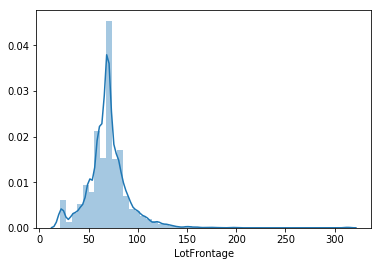

LotArea


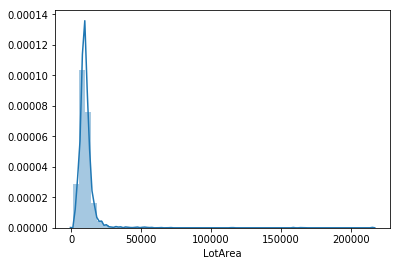

YearBuilt


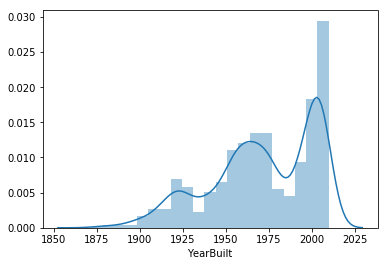

YearRemodAdd


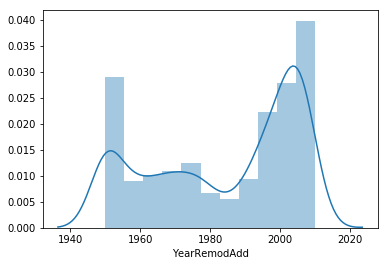

MasVnrArea


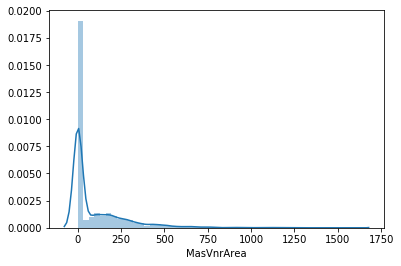

BsmtFinSF1


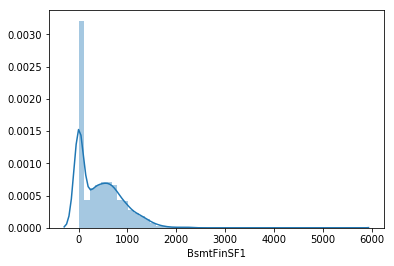

BsmtFinSF2


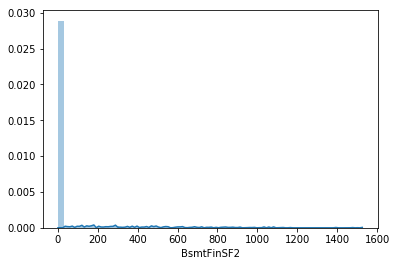

BsmtUnfSF


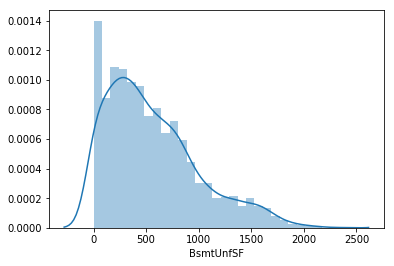

TotalBsmtSF


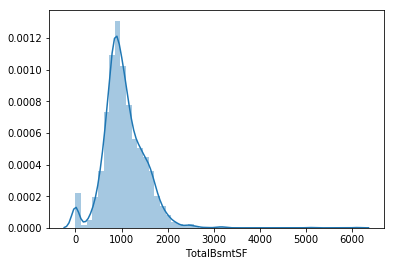

1stFlrSF


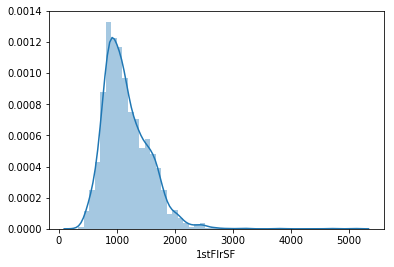

2ndFlrSF


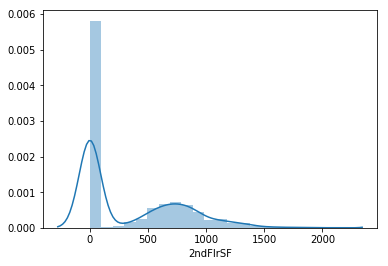

LowQualFinSF


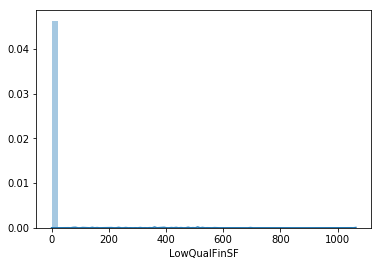

GrLivArea


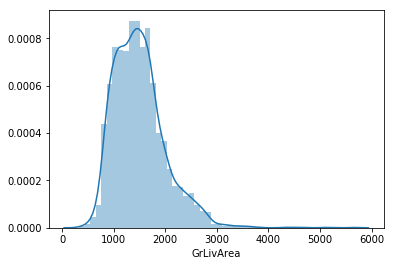

BsmtFullBath


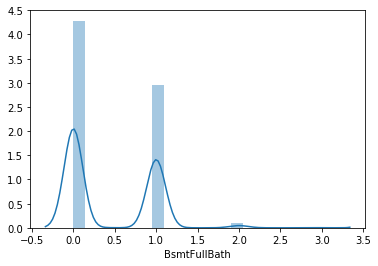

BsmtHalfBath


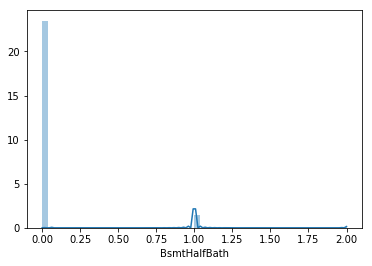

FullBath


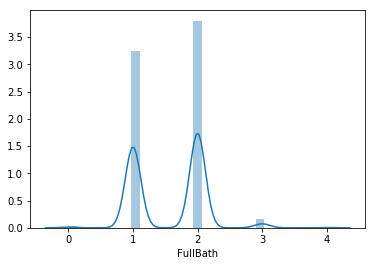

HalfBath


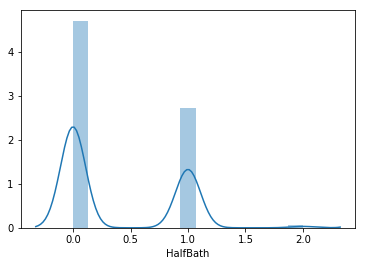

BedroomAbvGr


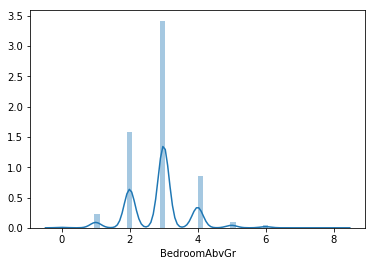

KitchenAbvGr


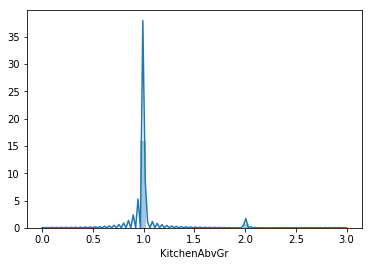

TotRmsAbvGrd


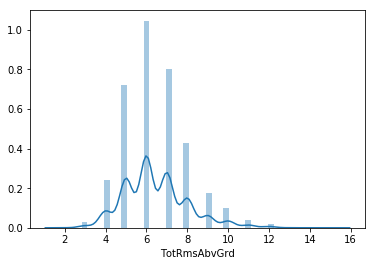

Fireplaces


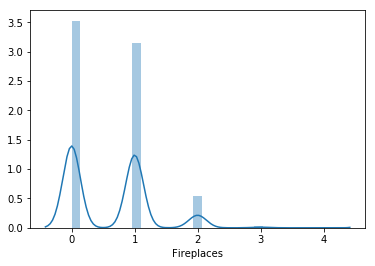

GarageYrBlt


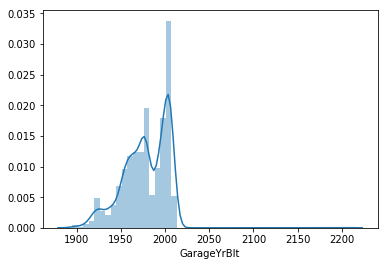

GarageCars


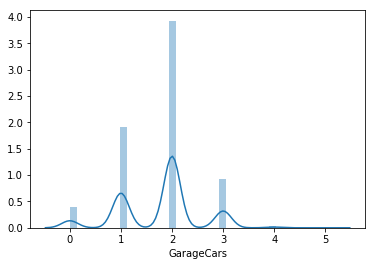

GarageArea


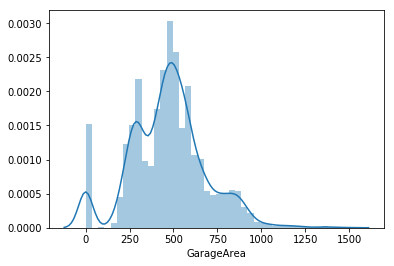

WoodDeckSF


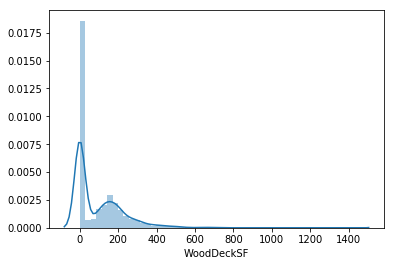

OpenPorchSF


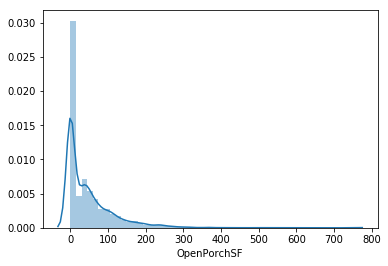

EnclosedPorch


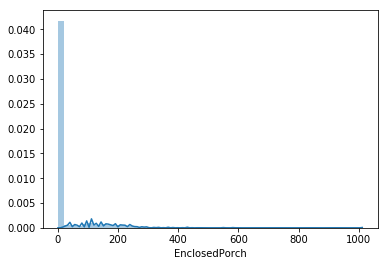

3SsnPorch


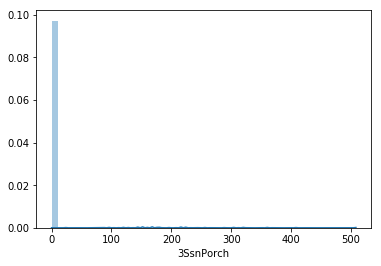

ScreenPorch


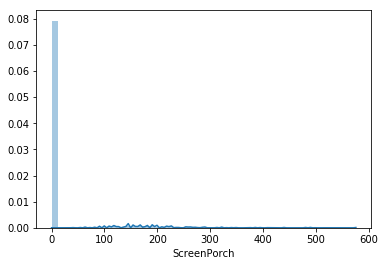

PoolArea


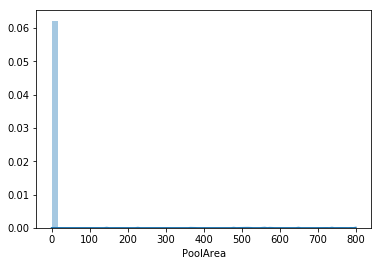

MiscVal


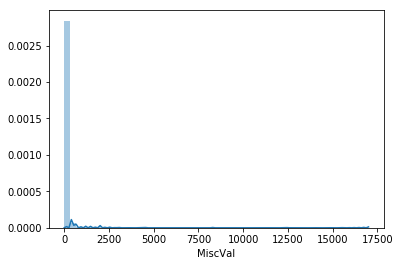

MoSold


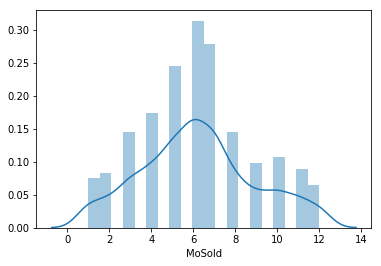

YrSold


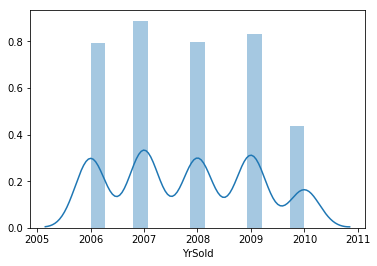

In [30]:
plot_histogram(df,numeric_columns)

In [31]:
#remove the skewness from the numerical columns

In [32]:
def remove_skewness(df, numeric_columns):
    for col in numeric_columns:
        df[col] = np.log(df[col] + 1)
        #df[col].describe()

In [33]:
remove_skewness(df, numeric_columns)

In [34]:
calculate_skew(df,numeric_columns)

Skewness of column LotFrontage -1.0199854601839196
Skewness of column BsmtFinSF2 2.4597789857884544
Skewness of column BsmtUnfSF -2.1603176057405995
Skewness of column TotalBsmtSF -4.9842983247421175
Skewness of column LowQualFinSF 8.56209088801536
Skewness of column BsmtHalfBath 3.776186906805351
Skewness of column KitchenAbvGr 3.5221608468499483
Skewness of column GarageCars -1.276104321225927
Skewness of column GarageArea -3.523447948128162
Skewness of column EnclosedPorch 1.9620890015074595
Skewness of column 3SsnPorch 8.829793819788062
Skewness of column ScreenPorch 2.9474199516113737
Skewness of column PoolArea 15.006047051771919
Skewness of column MiscVal 5.216664735729965
Columns that are skewed are: ['LotFrontage', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'GarageCars', 'GarageArea', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


In [35]:
df['LotFrontage'].describe()

count    2919.000000
mean        4.205612
std         0.321011
min         3.091042
25%         4.110874
50%         4.252854
75%         4.369448
max         5.749393
Name: LotFrontage, dtype: float64

In [36]:
#Excellent way is normalize after log

In [37]:
def normalize(column):
    upper = column.max()
    lower = column.min()
    y = (column - lower)/(upper-lower)
    return y

def nomalize_data(df,numeric_columns):
    for col in numeric_columns:
        df[col] = normalize(df[col])
        #df[col].describe()

In [38]:
nomalize_data(df,numeric_columns)

In [39]:
df['LotFrontage'].describe()

count    2919.000000
mean        0.419271
std         0.120756
min         0.000000
25%         0.383633
50%         0.437042
75%         0.480902
max         1.000000
Name: LotFrontage, dtype: float64

In [40]:
calculate_skew(df,numeric_columns)

Skewness of column LotFrontage -1.019985460183922
Skewness of column BsmtFinSF2 2.4597789857884536
Skewness of column BsmtUnfSF -2.1603176057406017
Skewness of column TotalBsmtSF -4.984298324742114
Skewness of column LowQualFinSF 8.562090888015359
Skewness of column BsmtHalfBath 3.7761869068053517
Skewness of column KitchenAbvGr 3.522160846849951
Skewness of column GarageCars -1.2761043212259269
Skewness of column GarageArea -3.523447948128163
Skewness of column EnclosedPorch 1.962089001507458
Skewness of column 3SsnPorch 8.829793819788058
Skewness of column ScreenPorch 2.9474199516113737
Skewness of column PoolArea 15.006047051771922
Skewness of column MiscVal 5.216664735729962
Columns that are skewed are: ['LotFrontage', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'GarageCars', 'GarageArea', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


In [41]:
df = pd.get_dummies(data=df, drop_first=True)

In [42]:
df.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,0.419271,0.376622,0.725085,0.572945,0.286753,0.489325,0.093072,0.725494,0.772349,0.437186,...,0.003083,0.002741,0.081877,0.002398,0.865022,0.004111,0.008222,0.015759,0.822885,0.083933
std,0.120756,0.099808,0.217084,0.348313,0.355633,0.345084,0.256368,0.240633,0.134882,0.118530,...,0.055451,0.052289,0.274225,0.048920,0.341758,0.063996,0.090317,0.124562,0.381832,0.277335
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.383633,0.342354,0.599135,0.252854,0.000000,0.000000,0.000000,0.695942,0.765910,0.353544,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.437042,0.388225,0.738782,0.719728,0.000000,0.684550,0.000000,0.792673,0.791332,0.431053,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.480902,0.427778,0.936906,0.901352,0.691602,0.763847,0.000000,0.862757,0.822729,0.522339,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
X = df.iloc[0:1460, :]
X_test = df.iloc[1460:, :]

In [44]:
print('Dimension of training Data',X.shape)
print('Dimension of testing Data',X_test.shape)

Dimension of training Data (1460, 265)
Dimension of testing Data (1459, 265)


In [45]:
#Spliting training data in train and vaildation set

from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = 0.25, random_state = 42)

In [46]:
from sklearn.linear_model import LinearRegression 
linreg= LinearRegression()
#y_train=y_train.apply(np.log)
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_val)
#print (y_pred)

In [47]:
# import packages
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# MAE calculation
mae = mean_absolute_error(y_val, y_pred)
print ("mean absolute error", mae)


rmse = np.sqrt(mean_squared_error(y_val,y_pred))
print ("root mean square error", rmse)

# R-squared calculation
rsquared = r2_score(y_val,y_pred)
print ('rsquared',rsquared)


mean absolute error 640139014.7781773
root mean square error 6977371490.983002
rsquared -2.8115344107769014e+20


In [48]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

model1=sm.OLS(y_train,X_train)
result=model1.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     61.10
Date:                Sun, 01 Mar 2020   Prob (F-statistic):               0.00
Time:                        16:41:30   Log-Likelihood:                 1099.0
No. Observations:                1095   AIC:                            -1684.
Df Residuals:                     838   BIC:                            -399.4
Df Model:                         256                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
LotFrontage               0.01

In [61]:
#Applying Regularisation

In [49]:
from sklearn.linear_model import Lasso
lasso = Lasso()

# fit and predict
lasso.fit(X_train, y_train)

lasso_pred = lasso.predict(X_val)
# calculate RMSE

lasso_rmse= np.sqrt(mean_squared_error(y_val,lasso_pred))
print ('Root mean sqaure error', lasso_rmse)

Root mean sqaure error 0.41706190839431884


In [50]:
# check how many feature coefficients are zero
zero_features = np.sum(lasso.coef_==0)
print (zero_features)

265


In [51]:
from sklearn.linear_model import Ridge
ridge = Ridge()

# fit and predict
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_val)

# calculate RMSE
ridge_rmse= np.sqrt(mean_squared_error(y_val,ridge_pred))
print ('Root mean sqaure error', ridge_rmse)

Root mean sqaure error 0.1297045948978936


In [52]:
#so here we conclude that the Ridge model is performing better than any model, so the final model,
#we will use for submission is Ridge.

#Predicting Test data with Ridge model
ridge_testprediction = ridge.predict(X_test)

In [53]:
len(ridge_testprediction)

1459

In [54]:
y_predicted = np.expm1(ridge_testprediction)

In [55]:
df_output['SalePrice'] = y_predicted.copy()

In [56]:
df_output.shape

(1459, 2)

In [57]:
#Generate the submission file
def generate_output(df_output):
    df_output.to_csv(r'Data/sample_submission.csv')

In [58]:
#Generate the sample_submission file
generate_output(df_output)

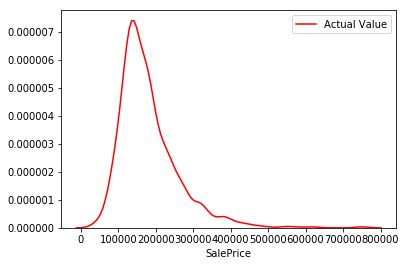

In [59]:
y_actual = df_train['SalePrice'].copy()
ax1 = sns.distplot(y_actual, hist=False, color="r", label="Actual Value")

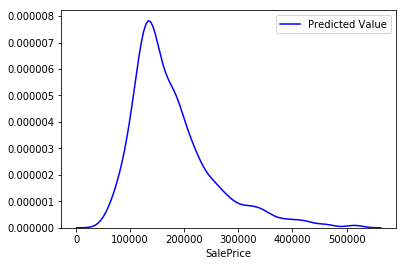

In [60]:
y_predicted = df_output['SalePrice'].copy()
ax2 = sns.distplot(y_predicted, hist=False, color="b", label="Predicted Value")